In [6]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import time
import json
import requests
from bs4 import BeautifulSoup
import json
import requests
from bs4 import BeautifulSoup
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("Dataset") if isfile(join("Dataset", f))]
import re
import operator

from collections import Counter

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
import nltk
from nltk.tokenize import word_tokenize

%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

import pattern
from pattern.en import sentiment
from pattern.en import mood
from textblob import TextBlob

from pattern.en import modality

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
def get_json_from_page(url):
    res = requests.get(url)
    html_page = res.content

    soup = BeautifulSoup(html_page, "lxml")

    dictionary = json.loads(res.content)
    return dictionary

def get_all_tweets_url(dictionary):
    url_tweets = []
    for tweet_data in dictionary['posts']['twitter']:
        url = "https://www.twitter.com/" + tweet_data['author']['tweeter_id'] + "/status/" + tweet_data['tweet_id']
        url_tweets.append(url)
#     print(url_tweets)
    return url_tweets

def get_thread(url):
    headers = {'User-Agent': 'Nokia5310XpressMusic_CMCC/2.0 (10.10) Profile/MIDP-2.1 Configuration/CLDC-1.1 UCWEB/2.0 (Java; U; MIDP-2.0; en-US; Nokia5310XpressMusic) U2/1.0.0 UCBrowser/9.5.0.449 U2/1.0.0 Mobile'}

    res = requests.get(url, headers=headers)
    html_page = res.content
    
    soup = BeautifulSoup(html_page, 'html.parser')

    items = soup.findAll('div', {'class': 'tweet-text'})

    all_text = ""
    for item in items:
        all_text += item.getText() + "\n\n"
    return all_text

def get_json_from_page(url):
    res = requests.get(url)
    html_page = res.content

    soup = BeautifulSoup(html_page, "lxml")

    dictionary = json.loads(res.content)
    return dictionary

def get_all_news(dictionary):
    url_news = []
    for news in dictionary['posts']['news']:
        if news['name'] == 'yahoo':
            url = news['url']
            print(dictionary['doi'])
            url_news.append(url)
        if news['name'] == 'YAHOO':
            url = news['url']
            url_news.append(url)
#     print(url_tweets)
    return url_news

def extract_words_from_text(text):
    text = text.replace(".", "")
    text = text.replace("\n", " ")
    text = text.replace("(", " ")
    text = text.replace(")", " ")
    text = text.replace(",", "")
    all_words = text.split(" ")
    all_words = [word.lower() for word in all_words]
    for i in range(len(all_words)):
        if all_words[i] == " " or all_words[i] == "":
            all_words.pop(i)
    print(all_words)
    return all_words

#Given a list of words, this function creates a dictionary using words as keys 
#and their number of appearances as the corresponding values
def create_word_count_dict(word_list):
    word_counter = {"total_number_of_words": 0}
    for word in word_list:
        if word in word_counter:
            word_counter[word] += 1
        elif word not in word_counter:
            word_counter[word] = 1
        word_counter["total_number_of_words"] += 1
    return word_counter

#Creates a word probability dictionary from a word counter dictionary
def create_word_prob_dict(word_count_dict):
    for key in word_count_dict:
        if key is not "total_number_of_words":
            word_count_dict[key] = float(word_count_dict[key] / word_count_dict["total_number_of_words"])
    sorted_x = sorted(word_count_dict.items(), key=operator.itemgetter(1))
    return sorted_x

# Python program to convert a list to string  
def listToString(s):  
    str1 = ""    
    for ele in s:  
        str1 += ele   
    return str1  
          


In [8]:
all_yahoo = ['https://api.altmetric.com/v1/fetch/doi/10.2139/ssrn.3561244?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1186/s13578-020-00404-4?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.11.20031096?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/s41591-020-0819-2?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.04.23.20076042?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30753-4?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmc2001899?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.kint.2020.03.001?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.meegid.2020.104351?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.7326/m20-1176?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.2807/1560-7917.es.2020.25.5.2000080?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1136/bmj.m1728?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/d41586-020-00741-x?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1164/rccm.202003-0817le?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s2352-4642(20)30105-x?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/s41591-020-0822-7?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.04.01.20049528?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.04.02.20051318?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.09.20033217?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1136/bmj.m1328?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30360-3?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1093/nsr/nwaa036?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.01.24.919159?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.6775?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30817-5?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30460-8?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/s41574-020-0353-9?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmoa2001282?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.05.20031815?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.ajogmf.2020.100106?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.2648?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.3390/nu12040988?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/s41587-020-0513-4?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1093/jtm/taaa020?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.3864?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.16.20037168?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.3390/jcm9020538?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30566-3?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.ijid.2020.03.020?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.30.015347?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.jaut.2020.102433?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1148/radiol.2020200343?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1002/uog.22006?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.03.13.990226?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30183-5?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/d41586-020-00740-y?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1126/science.abb7015?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmc2001468?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30418-9?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.6019?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.2214/ajr.20.22975?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.15585/mmwr.mm6913e2?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.15585/mmwr.mm6908e1?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.3201/eid1310.070576?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1002/jmv.25725?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jamaneurol.2020.1127?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/d41586-020-00927-3?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.redox.2020.101508?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/s0140-6736(20)30567-5?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1126/science.abb6936?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.04.01.021196?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1128/jvi.00127-20?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.4783?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1038/s41591-020-0820-9?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmc2009316?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1542/peds.2020-0702?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.4756?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1101/2020.01.23.916395?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1126/science.abb7566?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.3201/eid2606.200320?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.ijantimicag.2020.105949?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1056/nejmp2002106?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jama.2020.2565?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.2807/1560-7917.es.2020.25.10.2000180?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1016/j.jcv.2020.104372?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1111/j.1423-0410.2004.00577.x?key=bfc9115e2490100d074ded6a3a2cb845', 'https://api.altmetric.com/v1/fetch/doi/10.1001/jamainternmed.2020.1764?key=bfc9115e2490100d074ded6a3a2cb845']

In [41]:
#select different API url
API_url = all_yahoo[1]
print(API_url)

https://api.altmetric.com/v1/fetch/doi/10.1186/s13578-020-00404-4?key=bfc9115e2490100d074ded6a3a2cb845


In [42]:
#get tweets
tweets = []
dictionary = get_json_from_page(API_url)
url_tweets = get_all_tweets_url(dictionary)
for url_tweet in url_tweets:
                    twitter_message = get_thread(url_tweet)
                    tweets.append(twitter_message)

print(tweets)

['\n  SARS-CoV-2 and COVID-19: The most important research questions dlvr.it/RS22CX\n\n\n\n', '\n cellandbioscience.biomedcentral.com/articles/10.11…\n\n\n\n', '\n  📚\nSARS-CoV-2 and COVID-19: The most important research questions.\n\nCell Biosci\nzpr.io/trqMt\n#COVID19 #COVID19Papers #SARSCoV2\n\n\n\n', '\n  SARS-CoV-2 and COVID-19: The most important research questions (from the point of view of Wuhan epidemics experience) cellandbioscience.biomedcentral.com/articles/10.11…\n\n\n\n', '\n  SARS-CoV-2 and COVID-19: The most important research questions (from the point of view of Wuhan epidemics experience) cellandbioscience.biomedcentral.com/articles/10.11…\n\n\n\n', '\n  De esta pregunta va a depender TODO en los próximos meses/años:\n\nIs the virus less transmissible after several passages in humans?\n\ncellandbioscience.biomedcentral.com/articles/10.11…\n\n\n\n', '\n  De esta pregunta va a depender TODO en los próximos meses/años:\n\nIs the virus less transmissible after several pas

In [43]:
tweets = listToString(tweets)

In [44]:
total_number_of_tweets = len(tweets)
countern = 1

from textblob import TextBlob
tb = TextBlob(tweets)
tweets_sentences = tb.sentences

print(tweets_sentences)

[Sentence("
  SARS-CoV-2 and COVID-19: The most important research questions dlvr.it/RS22CX




 cellandbioscience.biomedcentral.com/articles/10.11…




  📚
SARS-CoV-2 and COVID-19: The most important research questions."), Sentence("Cell Biosci
zpr.io/trqMt
#COVID19 #COVID19Papers #SARSCoV2




  SARS-CoV-2 and COVID-19: The most important research questions (from the point of view of Wuhan epidemics experience) cellandbioscience.biomedcentral.com/articles/10.11…




  SARS-CoV-2 and COVID-19: The most important research questions (from the point of view of Wuhan epidemics experience) cellandbioscience.biomedcentral.com/articles/10.11…




  De esta pregunta va a depender TODO en los próximos meses/años:

Is the virus less transmissible after several passages in humans?"), Sentence("cellandbioscience.biomedcentral.com/articles/10.11…




  De esta pregunta va a depender TODO en los próximos meses/años:

Is the virus less transmissible after several passages in humans?"), Sentence("cel

In [45]:
total_number_of_tweets = len(tweets)
countern = 1
for i in range(1):
    word_list_tweet = re.sub("[^\w]", " ",  tweets).split()
print(word_list_tweet)

['SARS', 'CoV', '2', 'and', 'COVID', '19', 'The', 'most', 'important', 'research', 'questions', 'dlvr', 'it', 'RS22CX', 'cellandbioscience', 'biomedcentral', 'com', 'articles', '10', '11', 'SARS', 'CoV', '2', 'and', 'COVID', '19', 'The', 'most', 'important', 'research', 'questions', 'Cell', 'Biosci', 'zpr', 'io', 'trqMt', 'COVID19', 'COVID19Papers', 'SARSCoV2', 'SARS', 'CoV', '2', 'and', 'COVID', '19', 'The', 'most', 'important', 'research', 'questions', 'from', 'the', 'point', 'of', 'view', 'of', 'Wuhan', 'epidemics', 'experience', 'cellandbioscience', 'biomedcentral', 'com', 'articles', '10', '11', 'SARS', 'CoV', '2', 'and', 'COVID', '19', 'The', 'most', 'important', 'research', 'questions', 'from', 'the', 'point', 'of', 'view', 'of', 'Wuhan', 'epidemics', 'experience', 'cellandbioscience', 'biomedcentral', 'com', 'articles', '10', '11', 'De', 'esta', 'pregunta', 'va', 'a', 'depender', 'TODO', 'en', 'los', 'próximos', 'meses', 'años', 'Is', 'the', 'virus', 'less', 'transmissible', 'a

In [46]:
dictionary = get_json_from_page(API_url)
doi = dictionary['citation']['doi']

In [47]:
dictionary = get_json_from_page(API_url)
#     print(dictionary)
url_news = []
#     print(dictionary['doi'])
for news in dictionary['posts']['news']:
#         print(news)
    if news['author']['name'] == 'Yahoo!':
        url = news['url']
        print(url)
        url_news.append(url)
    if news['author']['name'] == 'yahoo':
        url = news['url']
        print(url)
        url_news.append(url)


http://ct.moreover.com/?a=41703246219&p=1pl&v=1&x=Z8p60UAckQddUZUdQlO58g


In [48]:
print(url)

http://ct.moreover.com/?a=41703246219&p=1pl&v=1&x=Z8p60UAckQddUZUdQlO58g


In [49]:
# Request
r1 = requests.get(url)
r1.status_code

# We'll save in coverpage the cover page content
coverpage = r1.content

# Soup creation
soup1 = BeautifulSoup(coverpage, 'html.parser')

# News identification
coverpage_news = soup1.find_all('h3', class_='fc-item__title')
len(coverpage_news)

0

In [50]:
print(url)

http://ct.moreover.com/?a=41703246219&p=1pl&v=1&x=Z8p60UAckQddUZUdQlO58g


In [51]:
# Empty lists for content, links and titles
news_contents = []
list_titles = []

title = requests.get(url)
title_content = title.content
soup_article = BeautifulSoup(title_content, 'html.parser')
body = soup_article.find_all('div', class_='sticky-inner-wrapper')
y = body[0].find_all('h1')

# Unifying the paragraphs
list_paragraphs = []
for p in np.arange(0, len(y)):
    paragraph = y[p].get_text()
    list_paragraphs.append(paragraph)
    final_title = " ".join(list_paragraphs)
    print('TITLE:',final_title)
list_titles.append(final_title)

# Reading the content (it is divided in paragraphs)
article = requests.get(url)
article_content = article.content
soup_article = BeautifulSoup(article_content, 'html.parser')
body = soup_article.find_all('article', itemprop='articleBody')
x = body[0].find_all('p')

# Unifying the paragraphs
list_paragraphs = []
for p in np.arange(0, len(x)):
    paragraph = x[p].get_text()
    list_paragraphs.append(paragraph)
    final_article = " ".join(list_paragraphs)
    print('ARTICLE:', final_article)

news_contents.append(final_article)

TITLE: Coronavirus: the nine most important questions being asked by scientists
ARTICLE:  
ARTICLE:   Scientists have put together what they deem to be the nine most important questions on the coronavirus.
ARTICLE:   Scientists have put together what they deem to be the nine most important questions on the coronavirus. Virtually unheard of at the start of the year, the new strain has spread well beyond the Chinese city of Wuhan, where the virus is thought to have emerged at a seafood and live animal market at the end of last year.
ARTICLE:   Scientists have put together what they deem to be the nine most important questions on the coronavirus. Virtually unheard of at the start of the year, the new strain has spread well beyond the Chinese city of Wuhan, where the virus is thought to have emerged at a seafood and live animal market at the end of last year. Since the outbreak was identified, more than 387,800 cases have been confirmed across more than 160 countries, according to Johns Ho

<BarContainer object of 4 artists>

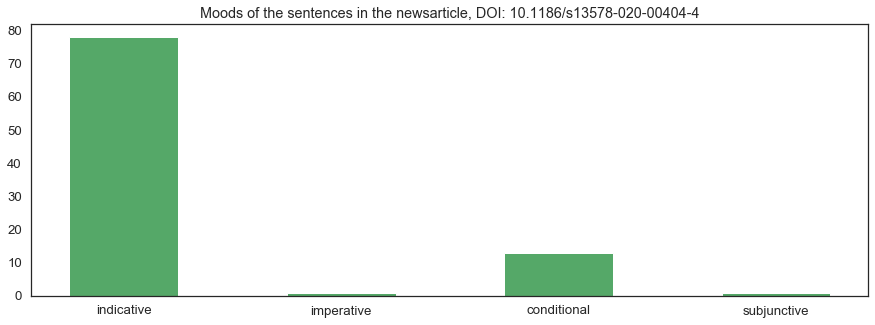

In [52]:
#moods of the sentences in the newsarticle
from textblob import TextBlob
tb = TextBlob(final_article)
sentences = tb.sentences

moods = [mood(str(s)) for s in sentences if len(sentences)>1]

moods = Counter(moods)

plt.figure(figsize=(15,5))
plt.title('Moods of the sentences in the newsarticle, DOI: 10.1186/s13578-020-00404-4')
plt.bar(moods.keys(), moods.values(), width=.5, color='g')

Sentences with negative modality:
-0.027777777777777776 Carrying out these tests would enable scientists to predict the true number of patients, as well as how many did not develop the tell-tale fever and cough.
Sentences with negative modality:
-0.5 How contagious the coronavirus is has been up for debate.
Sentences with negative modality:
-0.25 Creating a vaccine could lead to herd immunity, preventing the coronavirus taking hold if it re-emerges.


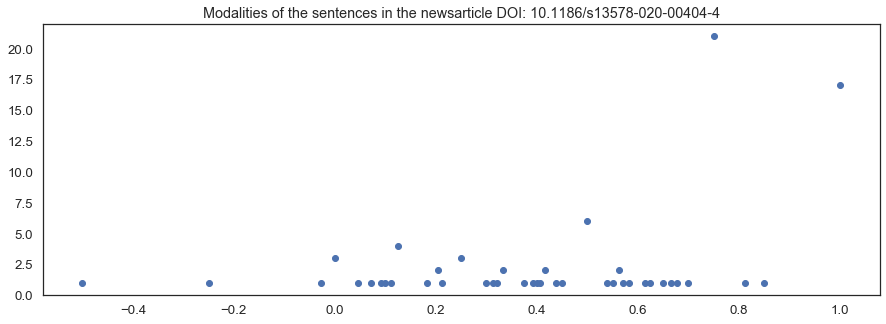

In [53]:
#MODALITY of the sentences in the newsarticle
from pattern.en import modality
modalities = [modality(str(s)) for s in sentences if len(s.words)>1]

modalities = Counter(modalities)

plt.figure(figsize=(15,5))
plt.title('Modalities of the sentences in the newsarticle DOI: 10.1186/s13578-020-00404-4')
# plt.bar(modalities.keys(), modalities.values(), width=.5, color='g')
plt.scatter(modalities.keys(), modalities.values())
plt.show

#print negative so possibole not true:
for s in sentences:
    if len(s.words)>1:
        if modality(str(s)) < 0.0:
            print('Sentences with negative modality:')
            print(modality(str(s)), s)

[(0.45, 0.75), (0.06818181818181818, 0.2553030303030303), (0.4666666666666666, 0.6666666666666666), (0.3111111111111111, 0.43333333333333335), (0.17329545454545453, 0.475), (0.325, 0.5499999999999999), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (-0.1, 0.3), (0.2, 0.2), (-0.041666666666666664, 0.125), (0.25, 0.275), (0.0, 0.0), (0.0, 0.0), (0.0, 0.35714285714285715), (0.0, 0.0), (0.13636363636363635, 0.45454545454545453), (0.425, 0.575), (0.5, 0.625), (0.0, 0.125), (0.25, 0.3), (0.0, 0.1), (0.2222222222222222, 0.5444444444444444), (0.0, 0.0), (0.0, 0.0), (0.0, 0.125), (-0.1, 0.4), (0.0, 0.125), (0.0, 0.0), (0.12067099567099568, 0.4816017316017316), (0.3333333333333333, 0.5625), (-0.15, 0.6749999999999999), (-0.14285714285714285, 0.7142857142857143), (0.24666666666666667, 0.41), (0.2, 0.2), (0.16666666666666669, 0.2833333333333333), (0.0, 1.0), (0.3666666666666667, 0.5499999999999999), (0.0, 0.0), (0.04999999999999999, 0.6), (0.0, 0.0), (-0.5, 1.0), (-0.07142857142857142, 0.14285714285714285), 

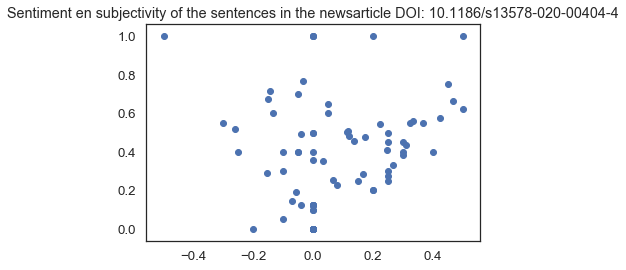

In [104]:
#get Sentiment en subjectivity scores of the sentences in the newsarticle

from pattern.en import sentiment
    
sentiment = [sentiment(str(s)) for s in sentences if len(s.words)>1]
print(sentiment)

x, y = zip(*sentiment)
plt.scatter(x, y)
plt.title('Sentiment en subjectivity of the sentences in the newsarticle DOI: 10.1186/s13578-020-00404-4')
plt.show()


# sentiment = Counter(sentiment)

# plt.figure(figsize=(15,5))
# plt.title('concepts appearance tweets')
# plt.bar(sentiment.keys(), sentiment.values(), width=.5, color='g')

[[-0.08245346  0.48992496]
 [-0.00869408  0.04901525]
 [ 0.27031441  0.44010138]
 [ 0.02380952  0.96666667]]
[2 1 2 2 2 2 1 1 1 0 2 1 2 1 1 0 1 2 2 2 1 2 1 2 1 1 1 0 1 1 2 2 0 0 2 2 2
 3 2 1 0 1 3 1 1 0 1 1 1 3 2 2 3 0 0 0 1 0 2 0 1 2 1 3 1 1 3 0 2 1 0 0 0 0
 1 2 3 1 1 1 1 1 2 0 1 2 1 2 2 2 0 0 1]


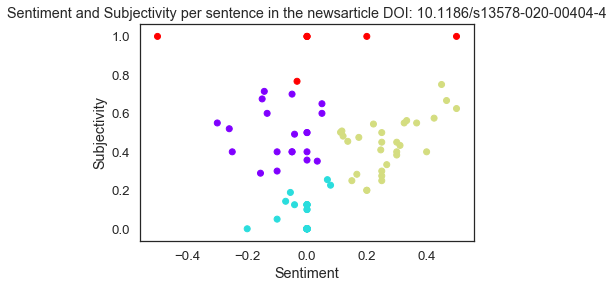

In [55]:
#K-MEANS over the senitment/subjectivity of the sentences in the newsarticle

x, y = zip(*sentiment)
# plt.scatter(x, y)
# plt.show()

X = np.array(sentiment)

# plt.scatter(X[:,0],X[:,1], label='True Position')

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.title('Sentiment and Subjectivity per sentence in the newsarticle DOI: 10.1186/s13578-020-00404-4')
plt.xlabel('Sentiment')
plt.ylabel('Subjectivity')

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

TWEETS with negative modality:
-0.25 nypost.com/2020/03/26/how…




  I wrote a short post on why superspreaders make forecasting difficult, you might like it.
-0.15 So... like... even if you could eat off plan with no depression, why would not at least be atkins?
-0.10714285714285714 Could I get citations for both NRLP3 causing damage, and sugar depressing immume system (presumably exogenous)?
-0.5 Sloppy & misleading particularly when official organisations like PHE are doing it in their reports.
-0.05 🤣

westernjournal.com/feds-buying-ca…




  How the CDC Could Prolong the Lockdown for 3 More Years lewrockwell.com/2020/05/no_aut…




  What's funny is the CDC isn't a government organization.
-0.25 I would say at this point it's closer to the flu than then.
-0.5 I was curious if you would catch that.


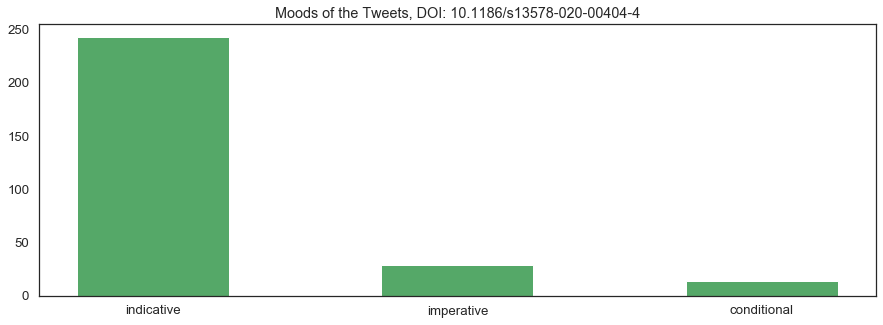

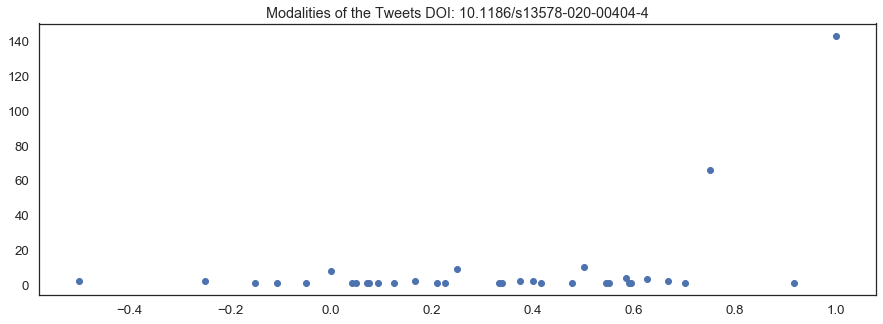

In [103]:
#mood FOR TWEETS
from pattern.en import sentiment

moods_T = [mood(str(s)) for s in tweets_sentences if len(tweets_sentences)>1]
moods_T = Counter(moods_T)

plt.figure(figsize=(15,5))
plt.title('Moods of the Tweets, DOI: 10.1186/s13578-020-00404-4')
plt.bar(moods_T.keys(), moods_T.values(), width=.5, color='g')



#MODALITY of the sentences in the newsarticle
from pattern.en import modality
modalities_T = [modality(str(s)) for s in tweets_sentences if len(s.words)>1]

modalities_T = Counter(modalities_T)

plt.figure(figsize=(15,5))
plt.title('Modalities of the Tweets DOI: 10.1186/s13578-020-00404-4')
# plt.bar(modalities.keys(), modalities.values(), width=.5, color='g')
plt.scatter(modalities_T.keys(), modalities_T.values())
plt.show

#print negative so possibole not true:
print('TWEETS with negative modality:')
for s in tweets_sentences:
    if len(s.words)>1:
        if modality(str(s)) < 0.0:
            print(modality(str(s)), s)


[[ 8.08457711e-04  1.13557214e-02]
 [ 5.24209091e-01  8.29648485e-01]
 [ 9.30614628e-02  4.99989301e-01]
 [-3.07314815e-01  8.42777778e-01]]
[1 2 0 1 0 0 0 0 2 1 1 0 2 0 2 0 0 2 3 3 0 0 3 3 0 3 0 2 2 1 0 2 2 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 2 2 3 0 1 1 0 2 0 1 0 2 0 0 0 0 0 0 0 1 0 2 0 2 0 0 2 3 3 1 2 0 2
 0 0 0 0 0 1 1 0 0 0 3 0 0 0 2 2 3 3 0 0 0 2 0 0 1 1 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 2 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 3 2 0 2 0 3 1 2 0 1 0 2 0 0 1 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 1 3 3 0 0 3 0 0 2 0 0 1]


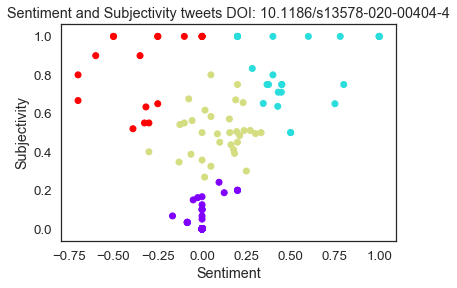

In [57]:
#Sentiment / subjectivity for TWEETS

sentiment_T = [sentiment(str(s)) for s in tweets_sentences if len(s.words)>1]
# print(sentiment_T)
x_T, y_T = zip(*sentiment_T)
# plt.scatter(x_T, y_T)
# plt.show()

X_T = np.array(sentiment_T)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_T)

print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.title('Sentiment and Subjectivity tweets DOI: 10.1186/s13578-020-00404-4')
plt.xlabel('Sentiment')
plt.ylabel('Subjectivity')

plt.scatter(X_T[:,0],X_T[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

In [58]:
# load Dimensions data

directory_name = "datasets_output/json_dimensions_cwts"

all_dimensions = []
for root, dirs, files in os.walk(directory_name):
    for file in files:
        if ".json" in file:
            all_data = codecs.open(os.path.join(root,file)).read()
            for record in all_data.split("\n"):
                if record:
                    all_dimensions.append(json.loads(record))

In [59]:
df_article = pd.DataFrame.from_dict({
    "doi":[r["doi"] for r in all_dimensions],
    "concepts":[r["concepts"] for r in all_dimensions],
    "year":[r["year"] for r in all_dimensions],
})


df_article = df_article[df_article.year >= 2020.0]

df_article.dropna()

,doi,concepts,year
886,10.1016/b978-0-08-102295-5.10439-1,"{'infectious diseases': 1.0, 'disease': 1.0, '...",2020
887,10.1016/b978-0-08-102659-5.00005-7,"{'leaves': 1.0, 'perennial shrub': 1.0, 'shrub...",2020
888,10.1016/b978-0-08-102295-5.10438-x,"{'communicable diseases': 1.0, 'serious threat...",2020
889,10.1016/b978-0-08-102295-5.10406-8,"{'basic cause': 1.0, 'data': 1.0, 'effect': 1....",2020
890,10.1016/b978-0-08-102565-9.00015-7,"{'conventional disinfection methods': 1.0, 'di...",2020
...,...,...,...
130143,10.3290/j.qi.a44392,"{'urgent need': 1.0, 'need': 1.0, 'protocol': ...",2020
130144,10.3290/j.cjdr.a44339,"{'disease': 1.0, 'respiratory disease': 1.0, '...",2020
130145,10.32858/temblor.078,{'pandemic': 1.0},2020
130146,10.33196/ziir202002014901,{},2020


In [60]:
#DOI pakken

concepts = []
length = df_article.shape[0]

for i in range(48885):
    for element in df_article.doi[i-1:i]:
        if doi in str(element):
            for entry in df_article.concepts[i-1:i]:
                #print(df_article.concepts[i-1:i])
                concepts.append(entry)
                    
print(concepts[0])

{'global health emergency': 1.0, 'health emergency': 1.0, 'emergency': 1.0, 'virus transmission': 1.0, 'transmission': 1.0, 'virus shedding': 1.0, 'shedding': 1.0, 'diagnosis': 1.0, 'treatment': 1.0, 'vaccine development': 1.0, 'development': 1.0, 'virus': 1.0, 'viral pathogenesis': 1.0, 'pathogenesis': 1.0}


In [61]:
total_number_of_files = len(final_article)
counter = 1
for i in range(1):
    word_list = re.sub("[^\w]", " ",  final_article).split()
    word_count_dict = create_word_count_dict(word_list)
    word_probability_dict = create_word_prob_dict(word_count_dict)
#     print("Word probability dict created for text #" + str(counter))
#     print(word_probability_dict)
    counter += 1

In [62]:
ten_percent = len(word_probability_dict)/10
ten_percent = round(ten_percent)
print(ten_percent)

print(word_probability_dict[ten_percent:])

77
[('helped', 0.0005181347150259067), ('protect', 0.0005181347150259067), ('cities', 0.0005181347150259067), ('although', 0.0005181347150259067), ('continued', 0.0005181347150259067), ('rise', 0.0005181347150259067), ('Based', 0.0005181347150259067), ('exported', 0.0005181347150259067), ('outside', 0.0005181347150259067), ('mainland', 0.0005181347150259067), ('70', 0.0005181347150259067), ('000', 0.0005181347150259067), ('25', 0.0005181347150259067), ('To', 0.0005181347150259067), ('determine', 0.0005181347150259067), ('underestimate', 0.0005181347150259067), ('carried', 0.0005181347150259067), ('within', 0.0005181347150259067), ('representative', 0.0005181347150259067), ('areas', 0.0005181347150259067), ('Put', 0.0005181347150259067), ('simply', 0.0005181347150259067), ('precursor', 0.0005181347150259067), ('Antibodies', 0.0005181347150259067), ('released', 0.0005181347150259067), ('fight', 0.0005181347150259067), ('invading', 0.0005181347150259067), ('pathogen', 0.000518134715025906

7.76 % of the most frequent words = concepts


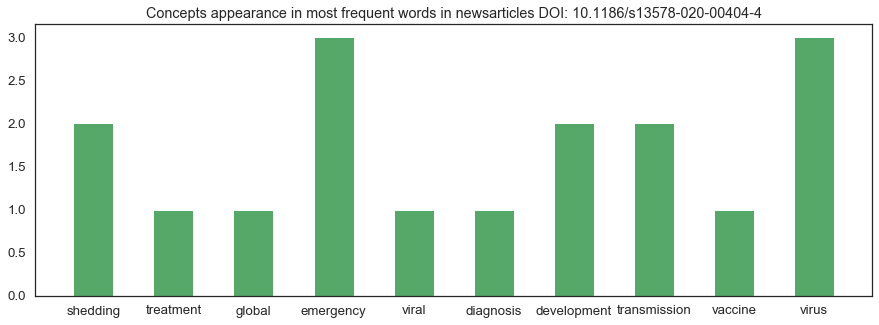

In [94]:
#comparing word prob. news article with concepts
doubles_freq = []

x = word_probability_dict
y = concepts[0]

concepts_y = []
for m in y:
    m_list = re.sub("[^\w]", " ",  m).split()
    concepts_y.extend(m_list)

counter = 0
for k in x:
    for m in concepts_y:
        if k[0] == m:
            counter += 1
            doubles_freq.append(m)
#             print(m)

length = len(concepts)
percentage = length/counter
# print(percentage)


counted = Counter(doubles_freq)
# print(y)
# print(counted)


plt.figure(figsize=(15,5))
plt.title('Concepts appearance in most frequent words in newsarticles DOI: 10.1186/s13578-020-00404-4')
plt.bar(counted.keys(), counted.values(), width=.5, color='g')

percentage_concepts_freq = 100 * (float(counts) / float(len(x)))
percent = round(percentage_concepts_freq, 2)
print(percent, "% of the most frequent words = concepts")

In [64]:
#POS-tagging

text = word_tokenize(final_article)
tagged = nltk.pos_tag(text)
nouns = []
for item in tagged:
    if item[1][0] == 'N':
      nouns.append(item[0])
    
print(nouns)

['Scientists', 'questions', 'coronavirus', 'Virtually', 'start', 'year', 'strain', 'city', 'Wuhan', 'virus', 'seafood', 'animal', 'market', 'end', 'year', 'outbreak', 'cases', 'countries', 'Johns', 'Hopkins', 'University', 'research', 'cases', 'patients', '”', 'date', 'updates', 'UK', 'world', 'Fact-checker', 'number', 'COVID-19', 'cases', 'area', 'Symptoms', 'advice', 'flu', 'World', 'Health', 'Organization', 'WHO', 'outbreak', '“', 'emergency', '”', 'infection', 'Scientists', 'University', 'Hong', 'Kong', 'evidence', 'research', 'questions', 'field', 'perspectives', 'Cases', 'China', 'end', 'February', 'Europe', 'epicentre', 'pandemic', 'Hubei', 'province', 'Wuhan', 'capital', '“', '”', 'beginning', 'year', 'Travel', 'restrictions', 'Hubei', 'Wuhan', 'midnight', 'lockdown', 'Wuhan', 'April', 'easing', 'restrictions', 'Hubei', 'Wuhan', 'hope', 'rest', 'world', 'end', 'stringent', 'control', 'measures', 'sight', '”', 'Professor', 'Andrew', 'Tatem', 'University', 'Southampton', 'lockdow

Counter({'virus': 39, 'emergency': 6, 'transmission': 6, 'development': 4, 'vaccine': 3, 'diagnosis': 1, 'treatment': 1})
9.1 % of the POS nouns = concepts


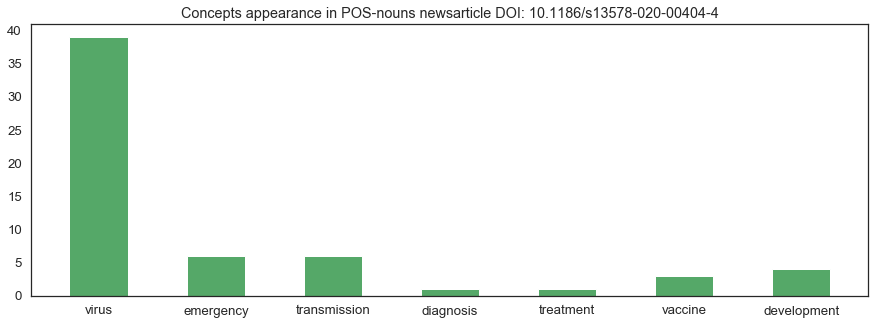

In [95]:
doubles_POS = []
counts = 0
for k in nouns:
    for m in concepts_y:
        if k == m:
            counts += 1
            doubles_POS.append(m)
#             print(m)
            
            
length = len(concepts)
percentage = length/counts
# print(percentage)


counteren = Counter(doubles_POS)
print(counteren)

plt.figure(figsize=(15,5))
plt.title('Concepts appearance in POS-nouns newsarticle DOI: 10.1186/s13578-020-00404-4')
plt.bar(counteren.keys(), counteren.values(), width=.5, color='g')

percentage_concepts_pos = 100 * (float(counts) / float(len(nouns)))
percent_pos = round(percentage_concepts_pos, 2)
print(percent_pos, "% of the POS nouns = concepts")

In [97]:
doubles_tweets = []
counts = 0
for k in word_list_tweet:
    for m in concepts_y:
        if k == m:
            counts += 1
            print(m)
            doubles_tweets.append(m)

virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
viral
shedding
shedding
virus
virus
virus
health
health
transmission
transmission
transmission
transmission
viral
transmission
transmission
shedding
shedding
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
virus
shedding
shedding
virus
virus
virus
health
health
virus
virus
virus
virus
virus
virus
health
health
viral
treatment
treatment
virus
virus
virus
virus
virus
virus
health
health
virus
virus
virus


In [67]:
recounted = Counter(doubles_tweets)
recounted

Counter({'virus': 72,
         'viral': 3,
         'shedding': 6,
         'health': 8,
         'transmission': 6,
         'treatment': 2})

1.91 % of the words in the tweets = concepts


<BarContainer object of 6 artists>

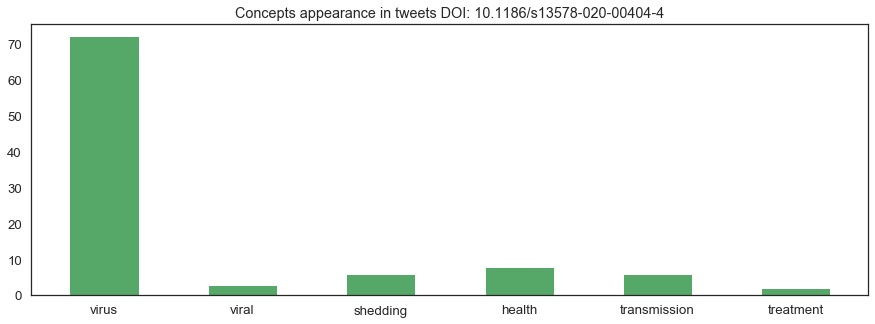

In [99]:
percentage_concepts_t = 100 * (float(counts) / float(len(word_list_tweet)))
percent_t = round(percentage_concepts_t, 2)
print(percent_t, "% of the words in the tweets = concepts")

plt.figure(figsize=(15,5))
plt.title('Concepts appearance in tweets DOI: 10.1186/s13578-020-00404-4')
plt.bar(recounted.keys(), recounted.values(), width=.5, color='g')